In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [2]:
pd.set_option('display.max_rows', 200)
data_path = "lending-club-loan-data/loan.csv"
data_desc_path = "lending-club-loan-data/LCDataDictionary.xlsx"

## Load & Preprocess Data

In [3]:
# LOAD ALL DATA

loan_df = pd.read_csv(data_path)
print(loan_df.shape)
loan_df.head()

/Users/Fyxstkala/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260668, 145)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
desc_df = pd.read_excel(data_desc_path, sheet_name='LoanStats')
print(desc_df.shape)
desc_df.head()

(153, 2)


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


### Missing Values

In [416]:
def get_percent_null_val(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
    return missing_value_df

missing_value_df = get_percent_null_val(loan_df)
missing_value_df

,column_name,percent_missing
id,id,100.000000
url,url,100.000000
member_id,member_id,100.000000
orig_projected_additional_accrued_interest,orig_projected_additional_accrued_interest,99.627278
hardship_length,hardship_length,99.530537
hardship_reason,hardship_reason,99.530537
hardship_status,hardship_status,99.530537
deferral_term,deferral_term,99.530537
hardship_amount,hardship_amount,99.530537
hardship_start_date,hardship_start_date,99.530537


In [417]:
col_to_remove = missing_value_df.loc[missing_value_df.percent_missing>80].column_name.tolist()
print(len(col_to_remove))
df = loan_df.drop(col_to_remove, axis=1).dropna()
print(df.shape)
df.head()

39
(75170, 106)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
8,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Legal Assistant III,10+ years,...,60.0,0.0,0.0,57426.0,41882.0,21500.0,34626.0,N,Cash,N
18,16000,16000,16000.0,60 months,20.89,431.87,D,D4,Neonatal Nurse Practitioner,4 years,...,100.0,0.0,0.0,444217.0,266754.0,13500.0,239338.0,N,Cash,N
23,3500,3500,3500.0,36 months,20.89,131.67,D,D4,gas attendant,10+ years,...,0.0,0.0,0.0,217000.0,26902.0,5000.0,25000.0,N,Cash,N
31,10000,10000,10000.0,60 months,19.92,264.50,D,D3,Material Handler,10+ years,...,50.0,0.0,0.0,170230.0,37606.0,8000.0,55030.0,N,Cash,N
32,16000,16000,16000.0,60 months,17.97,406.04,D,D1,Instructional Coordinator,5 years,...,0.0,0.0,0.0,67924.0,39339.0,29500.0,38424.0,N,Cash,N


### Feature Selection

In [5]:
loan_df['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [19]:
features_ls = ['home_ownership','annual_inc','delinq_2yrs','emp_length','grade',
               'loan_status','mort_acc', 'mo_sin_old_rev_tl_op', 'mths_since_last_delinq',
               'inq_fi','open_acc','pub_rec','pub_rec_bankruptcies','int_rate','term','loan_amnt']

In [20]:
df = loan_df[loan_df.columns & features_ls].dropna()
print(df.shape)
df.head()

(633572, 16)


,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,loan_status,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,inq_fi,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
1,30000,60 months,18.94,D,10+ years,MORTGAGE,90000.0,Current,0.0,71.0,13.0,1.0,2.0,378.0,3.0,1.0
8,5000,36 months,17.97,D,10+ years,MORTGAGE,53580.0,Current,0.0,32.0,8.0,0.0,2.0,244.0,3.0,0.0
9,6000,36 months,14.47,C,< 1 year,OWN,300000.0,Current,1.0,17.0,38.0,0.0,2.0,200.0,1.0,0.0
10,5500,36 months,22.35,D,< 1 year,MORTGAGE,50000.0,Current,1.0,22.0,6.0,0.0,2.0,105.0,3.0,0.0
13,6500,36 months,17.97,D,4 years,MORTGAGE,154000.0,Current,2.0,6.0,27.0,0.0,3.0,74.0,0.0,0.0


In [21]:
pd.set_option('display.max_colwidth',-1)

desc_df[desc_df['LoanStatNew'].isin(features_ls)]

,LoanStatNew,Description
4,annual_inc,The self-reported annual income provided by the borrower during registration.
16,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
23,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
29,grade,LC assigned loan grade
42,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
46,inq_fi,Number of personal finance inquiries
50,int_rate,Interest Rate on the loan
57,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
58,loan_status,Current status of the loan
62,mo_sin_old_rev_tl_op,Months since oldest revolving account opened


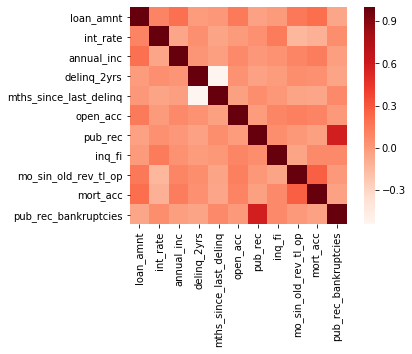

In [22]:
# Feature Correlation 

cor = df.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds, square = True)
plt.show()

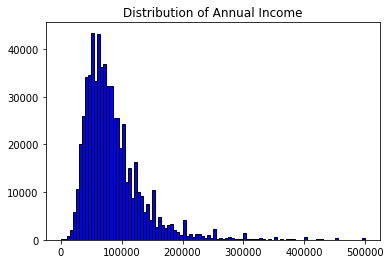

In [23]:
plt.title("Distribution of Annual Income")
plt.hist(df['annual_inc'], color = 'blue', edgecolor = 'black', range=[0, 500000],
         bins = 100)
plt.show()

### Data Preprocessing 

In [24]:
df0 = df.drop(['loan_status','grade','home_ownership','term'], axis=1)
print(type(df0), df0.shape)
df0.head()

<class 'pandas.core.frame.DataFrame'> (633572, 12)


,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,inq_fi,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
1,30000,18.94,10+ years,90000.0,0.0,71.0,13.0,1.0,2.0,378.0,3.0,1.0
8,5000,17.97,10+ years,53580.0,0.0,32.0,8.0,0.0,2.0,244.0,3.0,0.0
9,6000,14.47,< 1 year,300000.0,1.0,17.0,38.0,0.0,2.0,200.0,1.0,0.0
10,5500,22.35,< 1 year,50000.0,1.0,22.0,6.0,0.0,2.0,105.0,3.0,0.0
13,6500,17.97,4 years,154000.0,2.0,6.0,27.0,0.0,3.0,74.0,0.0,0.0


In [25]:
df0['annual_inc'] = np.log(1+df0['annual_inc'])
df0['loan_amnt'] = np.log(1+df0['loan_amnt'])

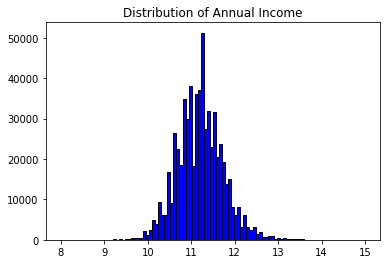

In [34]:
plt.title("Distribution of Annual Income")
plt.hist(df0['annual_inc'], color = 'blue', edgecolor = 'black', range=[8, 15],
         bins = 100)
plt.show()

#### Encode Employment Length

In [35]:
# RUN ONLY ONCE
df0.loc[df0.emp_length == "< 1 year", 'emp_length'] = 0
df0.loc[df0.emp_length == "1 year", 'emp_length'] = 1
df0.loc[df0.emp_length == "2 years", 'emp_length'] = 2
df0.loc[df0.emp_length == "3 years", 'emp_length'] = 3
df0.loc[df0.emp_length == "4 years", 'emp_length'] = 4
df0.loc[df0.emp_length == "5 years", 'emp_length'] = 5
df0.loc[df0.emp_length == "6 years", 'emp_length'] = 6
df0.loc[df0.emp_length == "7 years", 'emp_length'] = 7
df0.loc[df0.emp_length == "8 years", 'emp_length'] = 8
df0.loc[df0.emp_length == "9 years", 'emp_length'] = 9
df0.loc[df0.emp_length == "10+ years", 'emp_length'] = 10
df0['emp_length'].value_counts()

10    242381
2     60017 
0     54768 
3     53608 
1     42974 
5     41114 
4     40903 
6     29182 
8     23514 
7     23175 
9     21936 
Name: emp_length, dtype: int64

In [36]:
# Scaling By Features

from sklearn.preprocessing import minmax_scale
df0[df0.columns] = minmax_scale(df0[df0.columns], axis=1)
df0.head()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,inq_fi,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies
1,0.027272,0.050106,0.026455,0.030179,0.000000,0.187831,0.034392,0.002646,0.005291,1.0,0.007937,0.002646
8,0.034907,0.073648,0.040984,0.044627,0.000000,0.131148,0.032787,0.000000,0.008197,1.0,0.012295,0.000000
9,0.043498,0.072350,0.000000,0.063058,0.005000,0.085000,0.190000,0.000000,0.010000,1.0,0.005000,0.000000
10,0.082026,0.212857,0.000000,0.103046,0.009524,0.209524,0.057143,0.000000,0.019048,1.0,0.028571,0.000000
13,0.118645,0.242838,0.054054,0.161415,0.027027,0.081081,0.364865,0.000000,0.040541,1.0,0.000000,0.000000


#### Encode Term

In [37]:
df0['term'] = df['term'].factorize()[0]
df0.head()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,inq_fi,mo_sin_old_rev_tl_op,mort_acc,pub_rec_bankruptcies,term
1,0.027272,0.050106,0.026455,0.030179,0.000000,0.187831,0.034392,0.002646,0.005291,1.0,0.007937,0.002646,0
8,0.034907,0.073648,0.040984,0.044627,0.000000,0.131148,0.032787,0.000000,0.008197,1.0,0.012295,0.000000,1
9,0.043498,0.072350,0.000000,0.063058,0.005000,0.085000,0.190000,0.000000,0.010000,1.0,0.005000,0.000000,1
10,0.082026,0.212857,0.000000,0.103046,0.009524,0.209524,0.057143,0.000000,0.019048,1.0,0.028571,0.000000,1
13,0.118645,0.242838,0.054054,0.161415,0.027027,0.081081,0.364865,0.000000,0.040541,1.0,0.000000,0.000000,1


#### Encode Home Ownership and Grade

In [38]:
# One hot encoder home_ownership, and grade
df0['home_ownership'] = df['home_ownership']
df0 = pd.get_dummies(df0, columns=['home_ownership'], prefix = ['home'])
df0['grade']=df['grade']
df0 = pd.get_dummies(df0, columns = ['grade'], prefix=['grade'])
df0.head()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,inq_fi,mo_sin_old_rev_tl_op,...,home_NONE,home_OWN,home_RENT,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
1,0.027272,0.050106,0.026455,0.030179,0.000000,0.187831,0.034392,0.002646,0.005291,1.0,...,0,0,0,0,0,0,1,0,0,0
8,0.034907,0.073648,0.040984,0.044627,0.000000,0.131148,0.032787,0.000000,0.008197,1.0,...,0,0,0,0,0,0,1,0,0,0
9,0.043498,0.072350,0.000000,0.063058,0.005000,0.085000,0.190000,0.000000,0.010000,1.0,...,0,1,0,0,0,1,0,0,0,0
10,0.082026,0.212857,0.000000,0.103046,0.009524,0.209524,0.057143,0.000000,0.019048,1.0,...,0,0,0,0,0,0,1,0,0,0
13,0.118645,0.242838,0.054054,0.161415,0.027027,0.081081,0.364865,0.000000,0.040541,1.0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
df0.columns

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'delinq_2yrs',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'inq_fi',
       'mo_sin_old_rev_tl_op', 'mort_acc', 'pub_rec_bankruptcies', 'term',
       'home_ANY', 'home_MORTGAGE', 'home_NONE', 'home_OWN', 'home_RENT',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G'],
      dtype='object')

In [40]:
df0 = df0.drop(['home_ANY', 'home_NONE', 'grade_D'], axis=1)

#### Encode Loan Status (Target Feature)

In [41]:
df0['loan_status'] = df['loan_status']
df0['loan_status'].value_counts()

Current               379034
Fully Paid            184277
Charged Off           54713 
Late (31-120 days)    9771  
In Grace Period       4148  
Late (16-30 days)     1609  
Default               20    
Name: loan_status, dtype: int64

In [42]:
df0.loc[df0.loan_status == "Current", 'loan_status'] = 1
df0.loc[df0.loan_status == "Fully Paid", 'loan_status'] = 1
df0.loc[df0.loan_status == "In Grace Period", 'loan_status'] = 0
df0.loc[df0.loan_status == "Late (31-120 days)", 'loan_status'] = 0
df0.loc[df0.loan_status == "Late (16-30 days)", 'loan_status'] = 0
df0.loc[df0.loan_status == "Default", 'loan_status'] = 0
df0.loc[df0.loan_status == "Charged Off", 'loan_status'] = 0

In [43]:
df0['loan_status'].value_counts()

1    563311
0    70261 
Name: loan_status, dtype: int64

In [49]:
corr = df0.corr()['loan_status'].sort_values().to_frame()
print(corr.columns)
corr

Index(['loan_status'], dtype='object')


,loan_status
int_rate,-0.112006
grade_E,-0.095335
grade_F,-0.089298
grade_G,-0.064354
inq_fi,-0.053756
open_acc,-0.051398
loan_amnt,-0.051042
home_RENT,-0.046947
annual_inc,-0.041764
pub_rec,-0.040610


In [50]:
X = df0.drop(['loan_status'], axis=1).to_numpy()
y = df0['loan_status'].to_numpy()

#### Downsampling To Deal With Imbalanced Data

In [51]:
df_bad = df0[df0['loan_status']==0]
df_good = df0[df0['loan_status']==1].sample(n=len(df_bad))
df_downsampled = pd.concat([df_good,df_bad])
df_downsampled.head()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,inq_fi,mo_sin_old_rev_tl_op,...,home_MORTGAGE,home_OWN,home_RENT,grade_A,grade_B,grade_C,grade_E,grade_F,grade_G,loan_status
611613,0.041547,0.062060,0.004292,0.046923,0.004292,0.072961,0.060086,0.00,0.000000,1.0,...,1,0,0,0,0,1,0,0,0,1
322986,0.093927,0.095800,0.080000,0.116263,0.000000,0.350000,0.140000,0.01,0.000000,1.0,...,0,0,1,0,1,0,0,0,0,1
1648119,0.050247,0.089421,0.015789,0.058717,0.005263,0.026316,0.047368,0.00,0.010526,1.0,...,1,0,0,0,0,0,0,0,0,1
657155,0.060894,0.048405,0.012270,0.066129,0.000000,0.276074,0.116564,0.00,0.000000,1.0,...,1,0,0,1,0,0,0,0,0,1
172141,0.041196,0.050658,0.008772,0.047627,0.000000,0.320175,0.021930,0.00,0.004386,1.0,...,0,0,1,0,1,0,0,0,0,1


In [52]:
X = df_downsampled.drop(['loan_status'], axis=1).to_numpy()
y = df_downsampled['loan_status'].to_numpy()
print(X.shape, y.shape)
print(type(X), type(y))

(140522, 22) (140522,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## Split Data

In [917]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            test_size=0.2, 
                                                            random_state=42, 
                                                            stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                test_size=0.2, 
                                                random_state=42, 
                                                stratify = y_train_val)
print(Counter(y_train))
print(Counter(y_val))
print(Counter(y_test))

Counter({1: 349719, 0: 43727})
Counter({1: 87430, 0: 10932})
Counter({1: 109287, 0: 13665})


In [918]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(393446, 28) (393446,)
(98362, 28) (98362,)
(122952, 28) (122952,)


## Logistic Regression

In [923]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

clf = LogisticRegression(max_iter=5000, penalty='l2', solver ='liblinear', 
                         class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
accuracy = accuracy_score(y_pred, y_test)
train_accuracy = accuracy_score(y_pred_train, y_train)
print(accuracy, train_accuracy)

0.5964197410371527 0.5974974964798219


In [924]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(float(tn)/(tn+fn),float(tp)/(tp+fp))
print(classification_report(y_pred, y_test))

8994 4671 44950 64337
0.16672845914281478 0.9323121956874565
              precision    recall  f1-score   support

           0       0.66      0.17      0.27     53944
           1       0.59      0.93      0.72     69008

    accuracy                           0.60    122952
   macro avg       0.62      0.55      0.49    122952
weighted avg       0.62      0.60      0.52    122952



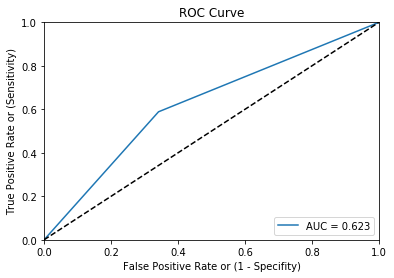

In [925]:
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
# Plot ROC curve
plt.plot(fpr, tpr, label='AUC = %0.3f' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc="lower right")

## PCA Regression

In [854]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_train)

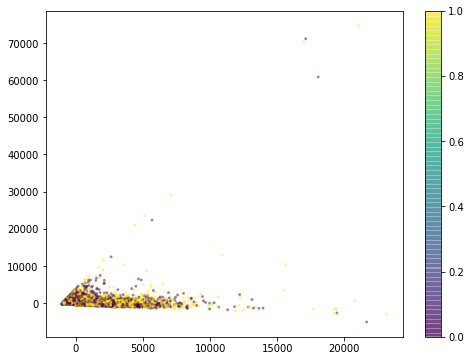

In [857]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_train, edgecolor='none', 
            alpha=0.5, s = 8)
#plt.xlim(-10, 30)
#plt.ylim(-10, 25)
plt.colorbar()
plt.show()

In [856]:
clf_pca = LogisticRegression(max_iter=5000, penalty='l2')
clf_pca.fit(X_reduced, y_train)
#y_pred = clf_pca.predict(X_test)
y_pred_train = clf_pca.predict(X_reduced)
#accuracy = accuracy_score(y_pred, y_test)
train_accuracy = accuracy_score(y_pred_train, y_train)
print(train_accuracy)

/Users/Fyxstkala/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.547731200650649


## Neural Net

In [926]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torchvision import transforms
from matplotlib.pyplot import figure
from torch.utils.data import Dataset, DataLoader

In [927]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

device(type='cpu')

In [928]:
class Dataset(Dataset):
    def __init__(self, data, labels, transform = None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        item = self.data[index]
        if self.transform is not None:
            item = self.transform(item)
        return (item, self.labels[index])

In [933]:
batch_size = 96

train_data = Dataset(X_train, y_train)
val_data = Dataset(X_test, y_test)

train_loader = DataLoader(dataset = train_data, batch_size = batch_size,
                              shuffle = True)
val_loader = DataLoader(dataset = val_data, batch_size = batch_size,
                              shuffle = True)

In [934]:
class Net(nn.Module):
    def __init__(self, n = 1000):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(n, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.Dropout(p=0.1),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2),
            nn.Sigmoid()
        )
    def forward(self, x):
        x = self.net(x)
        return x

In [935]:
def train_model(model, loss_fn, epochs, train_loader, val_loader, optimizer):

    train_accuracies = []; val_accuracies = []
    train_losses = []; val_losses = []

    model = model.to(device)
    loss_fn = loss_fn.cuda(device)
  
    for epoch in range(epochs):
        correct = 0.0
        cum_loss = 0.0

        for (i, (inputs, labels)) in enumerate(train_loader):
            inputs = Variable(inputs.float().to(device))
            labels = Variable(labels.to(device))
            pred = model(inputs)
            loss = loss_fn(pred, labels)

            _, max_labels = pred.max(1)
            correct += (max_labels == labels).sum().item()
            cum_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i + 1) % 400 == 0:
                print('Train-epoch %d. Iteration %05d, Avg-Loss: %.4f, Accuracy: %.4f' % 
                    (epoch, i + 1, cum_loss / (i + 1), correct / ((i + 1) * batch_size)))

        train_accuracies.append(correct / len(y_train))
        train_losses.append(cum_loss / (i + 1))   

        # Validation.
        correct = 0.0
        cum_loss = 0.0
        model.eval()
        for (i, (inputs, labels)) in enumerate(val_loader):
            inputs = Variable(inputs.float().to(device))
            labels = Variable(labels.to(device))

            pred = model(inputs)
            cum_loss += loss_fn(pred, labels).item()

            _, max_labels = pred.max(1)
            correct += (max_labels == labels).sum().item()

        val_accuracies.append(correct / len(y_test))
        val_losses.append(cum_loss / (i + 1))

        # Logging the current results on validation.
        print('Validation-epoch %d. Avg-Loss: %.4f, Accuracy: %.4f' % 
            (epoch, cum_loss / (i + 1), correct / len(y_test)))
        
    return model, train_accuracies, train_losses, val_accuracies, val_losses

In [936]:
num_epochs = 12
learning_rate = 0.0001

model = Net(n = X_train.shape[1])
criterion = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 1e-6)

trained_model, train_acc, train_loss, val_acc, val_loss = train_model(model, criterion, 
                                                num_epochs, train_loader, val_loader, optimizer)

Train-epoch 0. Iteration 00400, Avg-Loss: 0.6700, Accuracy: 0.6893
Train-epoch 0. Iteration 00800, Avg-Loss: 0.5675, Accuracy: 0.7897
Train-epoch 0. Iteration 01200, Avg-Loss: 0.5218, Accuracy: 0.8214
Train-epoch 0. Iteration 01600, Avg-Loss: 0.4979, Accuracy: 0.8380
Train-epoch 0. Iteration 02000, Avg-Loss: 0.4829, Accuracy: 0.8485
Train-epoch 0. Iteration 02400, Avg-Loss: 0.4731, Accuracy: 0.8553
Train-epoch 0. Iteration 02800, Avg-Loss: 0.4661, Accuracy: 0.8602
Train-epoch 0. Iteration 03200, Avg-Loss: 0.4610, Accuracy: 0.8636
Train-epoch 0. Iteration 03600, Avg-Loss: 0.4568, Accuracy: 0.8666
Train-epoch 0. Iteration 04000, Avg-Loss: 0.4536, Accuracy: 0.8687
Validation-epoch 0. Avg-Loss: 0.4244, Accuracy: 0.8889
Train-epoch 1. Iteration 00400, Avg-Loss: 0.4261, Accuracy: 0.8871
Train-epoch 1. Iteration 00800, Avg-Loss: 0.4258, Accuracy: 0.8874
Train-epoch 1. Iteration 01200, Avg-Loss: 0.4247, Accuracy: 0.8886
Train-epoch 1. Iteration 01600, Avg-Loss: 0.4248, Accuracy: 0.8884
Train-e

Train-epoch 11. Iteration 02000, Avg-Loss: 0.4240, Accuracy: 0.8892
Train-epoch 11. Iteration 02400, Avg-Loss: 0.4246, Accuracy: 0.8887
Train-epoch 11. Iteration 02800, Avg-Loss: 0.4244, Accuracy: 0.8889
Train-epoch 11. Iteration 03200, Avg-Loss: 0.4242, Accuracy: 0.8890
Train-epoch 11. Iteration 03600, Avg-Loss: 0.4241, Accuracy: 0.8892
Train-epoch 11. Iteration 04000, Avg-Loss: 0.4243, Accuracy: 0.8890
Validation-epoch 11. Avg-Loss: 0.4244, Accuracy: 0.8889


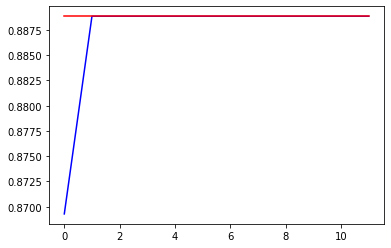

In [937]:
plt.figure()
plt.plot(range(num_epochs), train_acc, color = "b")
plt.plot(range(num_epochs), val_acc, color = "r")

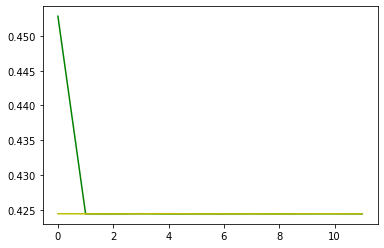

In [938]:
plt.figure()
plt.plot(range(num_epochs), train_loss, color = "g")
plt.plot(range(num_epochs), val_loss, color = "y")